In [1]:
import bt
import FinanceDataReader as fdr
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quantstats as qs
import seaborn as sns

# pd.options.display.float_format = '{:.4f}'.format
plt.style.use('ggplot') #ggplot
plt.rcParams['font.family'] = 'nanummyeongjo'
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.grid'] = True

plt.rcParams['axes.formatter.useoffset'] = False
# plt.rcParmas['axes.formatter.limits'] = -1000, 1000

plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
from IPython.display import display, HTML
"%config InlineBackend.figure_format = 'retina'"

#하나의 cell에서 multiple output을 출력을 가능하게 하는 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Pandas Dataframe의 사이즈가 큰 경우, 어떻게 화면에 출력을 할지를 세팅하는 코드
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('max_columns', None)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from strategy import*
from utils import *

prices는 현재 공휴일이 제외 되지 않았다. 

TODO:

1. 공휴일 제외 데이터를 만들어서(kospi기준) 백테스팅 필요

In [4]:
prices = pd.read_csv('data/assets.csv', index_col=0, parse_dates=True)
prices

,MKF500,에너지,화학,금속및광물,기타 소재,건설,조선,기타자본재,상업서비스,운송,자동차및부품,내구소비재및의류,소비자서비스,미디어,유통,음식료및담배,생활용품,의료,은행,보험,증권,기타금융,소프트웨어,하드웨어,반도체,디스플레이,통신서비스,유틸리티,코스피200,코스닥,달러,나스닥100,다우,현금
Symbol Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-02,1000,1000,1000,1000,1000,1000,0,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,65,557,1278,2128.780,34.810,100.000
2001-01-03,1004,998,1026,1002,1034,1030,0,1000,1022,1023,1006,1017,1012,1038,1018,1008,969,1029,997,1018,1023,988,1054,1018,1006,1013,992,986,65,569,1271,2528.380,35.190,100.005
2001-01-04,1082,1074,1091,1076,1105,1146,0,1068,1077,1084,1058,1048,1063,1094,1096,1025,1009,1079,1054,1068,1174,1083,1169,1088,1129,1097,1054,1028,70,615,1263,2460.040,36.810,100.011
2001-01-05,1131,1096,1155,1117,1170,1276,0,1133,1058,1186,1098,1141,1116,1125,1152,1022,989,1080,1113,1227,1301,1083,1240,1112,1175,1098,1091,1061,73,625,1263,2267.850,34.750,100.016
2001-01-06,1131,1096,1155,1117,1170,1276,0,1133,1058,1186,1098,1141,1116,1125,1152,1022,989,1080,1113,1227,1301,1083,1240,1112,1175,1098,1091,1061,73,625,1263,2267.850,34.750,100.022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-28,4557,6504,11603,3102,1499,3996,1143,5935,2975,3200,8198,9380,2780,1508,4739,5988,46963,14963,1939,6210,1679,141,4054,1801,16998,296,616,948,283,751,1204,9849.360,39.800,147.698
2020-06-29,4470,6413,11384,2995,1460,3905,1135,5864,2923,3109,7970,9180,2709,1476,4610,5925,45786,14717,1891,6070,1627,138,3970,1770,16797,288,608,929,278,735,1200,9961.160,40.980,147.706
2020-06-30,4499,6433,11414,2989,1480,3986,1118,5902,2941,3110,7988,9284,2779,1536,4732,5920,48231,14508,1894,6119,1645,138,4007,1782,17098,289,618,947,280,738,1199,10156.850,40.760,147.714


In [6]:
import requests

print('Beginning file download with requests')

url = "https://stats.oecd.org/sdmx-json/data/DP_LIVE/KOR.CLI.AMPLITUD.LTRENDIDX.M/OECD?contentType=csv&detail=code&separator=comma&csv-lang=en&startPeriod=2005-01"
r = requests.get(url)

with open('OECD_KOR.csv', 'wb') as f:
    f.write(r.content)

# Retrieve HTTP meta-data
print(r.status_code)
print(r.headers['content-type'])
print(r.encoding)

Beginning file download with requests


12128

200
text/csv
ISO-8859-1


In [9]:
raw_oecd = pd.read_csv('OECD_KOR.csv', index_col=5, parse_dates=True)[['Value']]
raw_oecd

,Value
TIME,
2005-01-01,99.907
2005-02-01,99.945
2005-03-01,99.991
2005-04-01,100.036
2005-05-01,100.108
...,...
2021-05-01,101.757
2021-06-01,101.872
2021-07-01,101.909


In [15]:
raw_oecd['전월비'] = (raw_oecd.pct_change()+1)
raw_oecd['2006']

,Value,전월비
TIME,,
2006-01-01,101.141,0.999
2006-02-01,100.980,0.998
2006-03-01,100.773,0.998
2006-04-01,100.556,0.998
2006-05-01,100.359,0.998
2006-06-01,100.222,0.999
2006-07-01,100.184,1.000
2006-08-01,100.240,1.001
2006-09-01,100.327,1.001


In [16]:
oecd['2006']

,전월비
Date,
2006-01-01,1.001
2006-02-01,1.000
2006-03-01,0.999
2006-04-01,0.998
2006-05-01,0.998
2006-06-01,0.998
2006-07-01,0.998
2006-08-01,0.999
2006-09-01,1.000


In [5]:
oecd = pd.read_csv("data/OECD.csv", index_col=0, parse_dates=True).rename_axis("Date")
oecd

,전월비
Date,
2002-01-02,1.007
2002-02-01,1.007
2002-03-01,1.007
2002-04-01,1.006
2002-05-01,1.005
...,...
2020-03-01,1.001
2020-04-01,1.001
2020-05-01,1.001


일자별 데이터로 변경한다.

In [6]:
oecd_MOM = oecd.resample('D').first().fillna(method='ffill') #전월비

## 한국 1. ID상대모멘텀
- **유니버스**
    - fnguide 섹터 인덱스
- **백테스팅 조건**
    - 섹터 인덱스의 6, 9, 12개월 수익률 평균값과 ID(직전 12개월의 월간 정보이산성)의 곱으로 상위 1개 섹터 선별
    - OECD 선행지표 (2개월 후행) 전월비 상승시 베팅, 하락시 현금 보유
- **월간 리밸런싱**

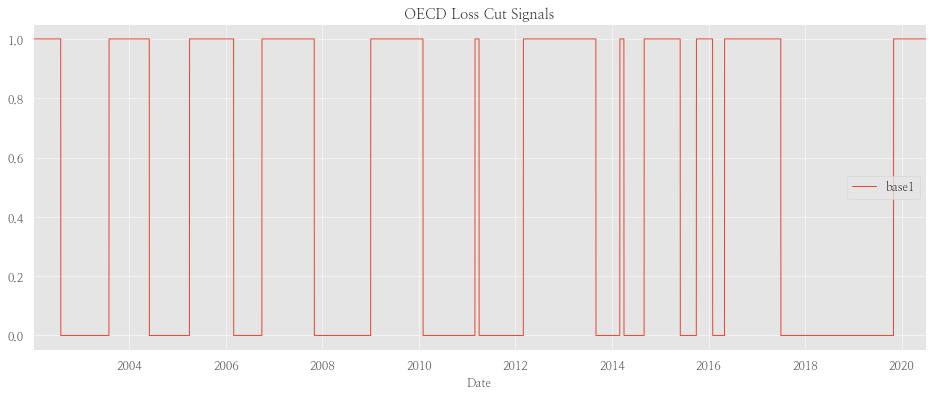

In [25]:
# np.where(oecd_MOM > 1, 1, 0)
target_weights = pd.DataFrame(np.where(oecd_MOM > 1, 1, 0), index=oecd_MOM.index)
target_weights['cash'] = 1 - target_weights
target_weights.columns = ['base1', '현금']
target_weights['base1'].plot(figsize=(16,6), title='OECD Loss Cut Signals', legend=True);

In [21]:
tickers = list(prices.columns[:-4])+['현금']

base1 = bt.Strategy('base1',
                    algos = [
                        bt.algos.RunAfterDate('2002-1-2'),
                        bt.algos.RunMonthly(),
                        bt.algos.SelectAll(),
                        bt.algos.SelectThese(tickers),
                        StatIDAverageMomentumScore(lag=pd.DateOffset(days=0)),
                        bt.algos.SelectN(n=1, sort_descending=True),
                        # bt.algos.PrintDate(),
                        bt.algos.WeighEqually(),
                        # bt.algos.PrintTempData(),
                        bt.algos.Rebalance()
                    ],
                    )

In [26]:
kbase1 = bt.Strategy(
    'kbase1',
    [
        bt.algos.RunAfterDate('2002-1-2'),
        bt.algos.RunMonthly(),
        bt.algos.SelectAll(),
        bt.algos.SelectThese(tickers),
        StatIDAverageMomentumScore(lag=pd.DateOffset(days=0), cash='현금'),
        bt.algos.SelectN(n=1, sort_descending=True),
        # bt.algos.PrintDate(),
        WeighEquallyWithoutCash(target_weights, cash='현금'),
        # bt.algos.PrintTempData(),
        bt.algos.Rebalance()
    ]
)

In [27]:
bt_id1 = bt.Backtest(base1, prices)
bt_kbase1 = bt.Backtest(kbase1, prices)
r = bt.run(bt_id1, bt_kbase1)

In [28]:
r.set_date_range("2002-02-01")
r.display()

Stat                 base1       kbase1
-------------------  ----------  ----------
Start                2002-02-01  2002-02-01
End                  2020-07-02  2020-07-02
Risk-free rate       0.00%       0.00%

Total Return         1682.11%    6122.47%
Daily Sharpe         0.52        0.88
Daily Sortino        0.82        1.39
CAGR                 16.93%      25.15%
Max Drawdown         -69.87%     -36.60%
Calmar Ratio         0.24        0.69

MTD                  4.87%       4.87%
3m                   51.31%      51.31%
6m                   48.79%      48.79%
YTD                  47.02%      47.02%
1Y                   60.66%      55.29%
3Y (ann.)            6.50%       17.35%
5Y (ann.)            9.33%       23.16%
10Y (ann.)           13.64%      15.51%
Since Incep. (ann.)  16.93%      25.15%

Daily Sharpe         0.52        0.88
Daily Sortino        0.82        1.39
Daily Mean (ann.)    14.83%      17.44%
Daily Vol (ann.)     28.40%      19.81%
Daily Skew           -0.06       0

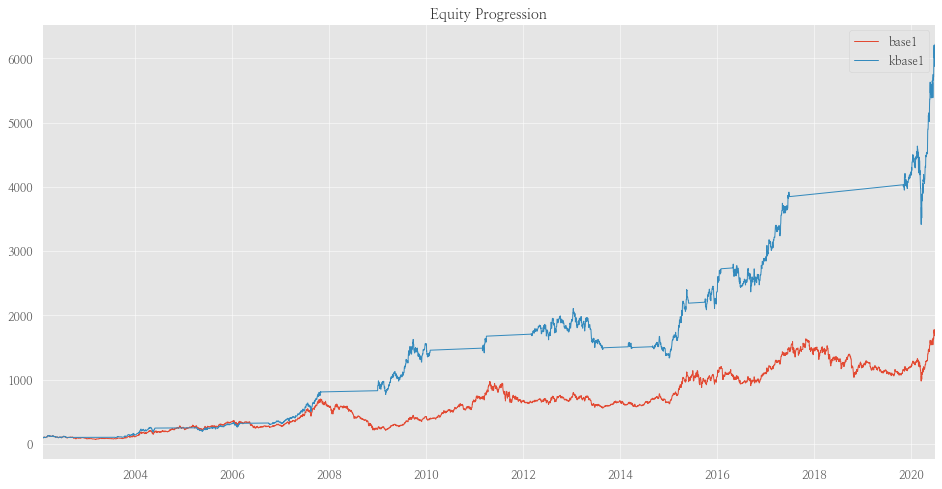

In [29]:
r.plot(figsize=(16,8));

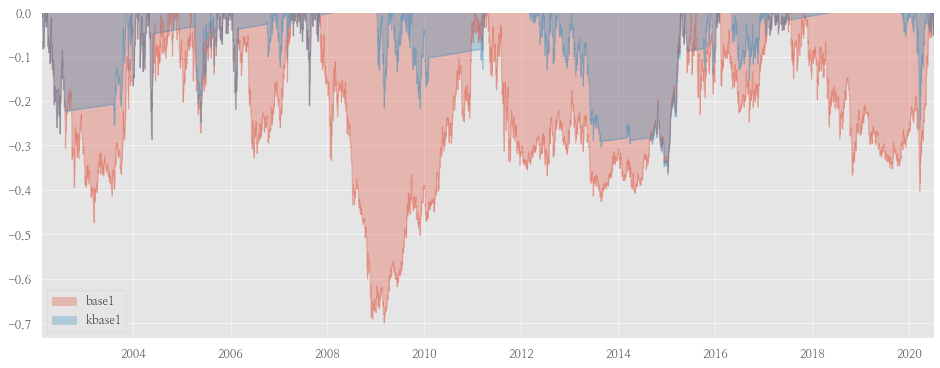

In [30]:
r.prices.to_drawdown_series().plot.area(stacked=False, alpha=0.3, figsize=(16, 6));